# Pymaceuticals Inc.
---

### Analysis : you will be writing your analysis here


In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
study_data_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [20]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [21]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_MouseID = study_data_complete.loc[study_data_complete.duplicated(subset= ["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_MouseID

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_Mouse_data = study_data_complete.loc[study_data_complete ["Mouse ID"] == "g989"]
dup_Mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = study_data_complete.drop(dup_Mouse_data.index)
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [24]:
# Checking the number of mice in the clean DataFrame.

len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [25]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
grouped_regimen = clean_df.groupby('Drug Regimen')
grouped_regimen


In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
volume_mean = grouped_regimen['Tumor Volume (mm3)'].mean()
volume_median = grouped_regimen['Tumor Volume (mm3)'].median()
volume_var = grouped_regimen['Tumor Volume (mm3)'].var()
volume_std = grouped_regimen['Tumor Volume (mm3)'].std()
volume_sem = grouped_regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({'Mean Tumor Volume': volume_mean,
                           'Median Tumor Volume': volume_median,
                           'Tumor Volume Variance': volume_var,
                           'Tumor Volume Std.': volume_std,
                           'Tumor Volume Std. Error': volume_sem})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
volume_mean = grouped_regimen['Tumor Volume (mm3)'].mean()
summary_table = grouped_regimen.agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})
summary_table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [28]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_drug = clean_df.groupby('Drug Regimen')
mouse_count = mouse_drug['Drug Regimen'].count()
mouse_count

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

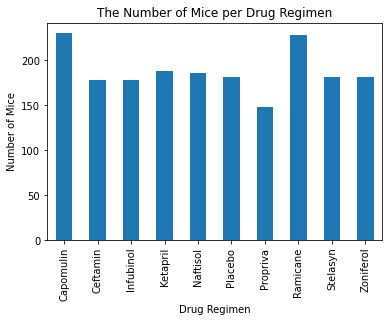

<Figure size 432x288 with 0 Axes>

In [29]:
mouse_chart = mouse_count.plot(kind='bar')
plt.title('The Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.show()
plt.tight_layout()

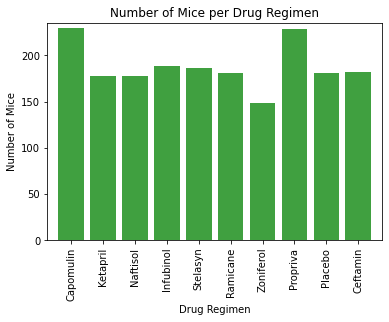

In [30]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
diff_drugs = clean_df['Drug Regimen'].unique()

drugs = diff_drugs
mice = mouse_count

x_axis = np.arange(0, len(drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
plt.title('Number of Mice per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice')

plt.xlim(-0.75, len(drugs)-.25)
plt.ylim(0, max(mice) + 5)

plt.bar(x_axis, mice, facecolor="green", alpha=0.75, align="center")
plt.xticks(tick_locations, drugs, rotation=90)
plt.show()

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_group = clean_df.groupby('Sex')
mice_sex = mice_group['Sex'].value_counts()
mice_sex

Sex     Sex   
Female  Female    922
Male    Male      958
Name: Sex, dtype: int64

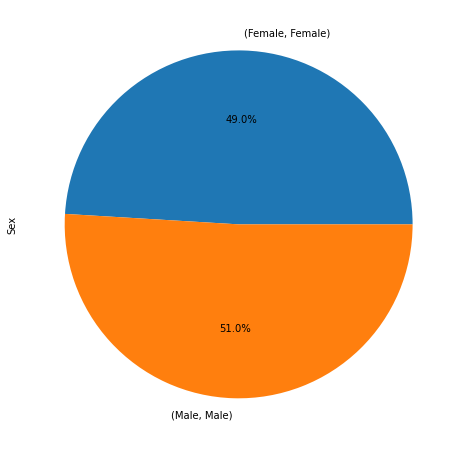

In [37]:
mice_pie = mice_sex.plot(kind='pie', subplots=True, figsize=(15, 8), autopct='%1.1f%%')

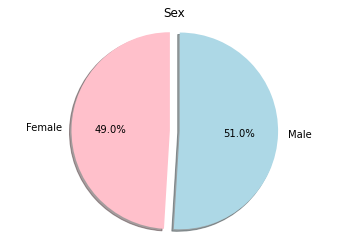

In [40]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']

count = [922, 958]

colors = ['pink', 'lightblue']

explode = (0.1, 0)
plt.title('Sex')

plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tumor = clean_df.groupby("Mouse ID").max()["Timepoint"]
max_tumor = max_tumor.reset_index()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_df = max_tumor.merge(clean_df, on= ["Mouse ID", "Timepoint"], how="left")

In [49]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = merge_df.loc[merge_df["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_list.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


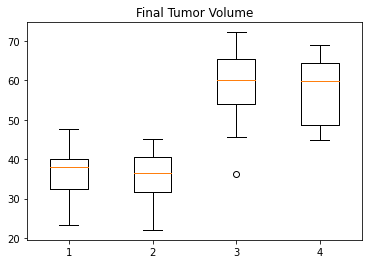

In [50]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.boxplot(tumor_vol_list)
plt.show()

## Line and Scatter Plots

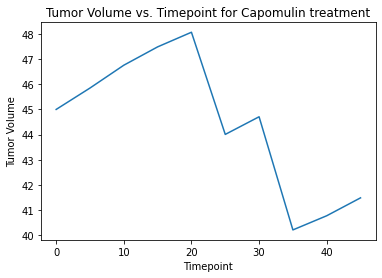

In [60]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_treatment = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']

mouse_data = capomulin_treatment.loc[capomulin_treatment["Mouse ID"] == 'l509']
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Timepoint for Capomulin treatment")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.show()

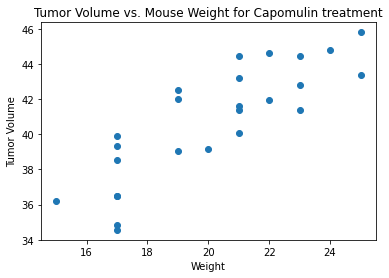

In [61]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_treatment = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin']
cap_avg = capomulin_treatment.groupby('Mouse ID').mean()

plt.scatter(cap_avg["Weight (g)"], cap_avg["Tumor Volume (mm3)"])

plt.title("Tumor Volume vs. Mouse Weight for Capomulin treatment")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

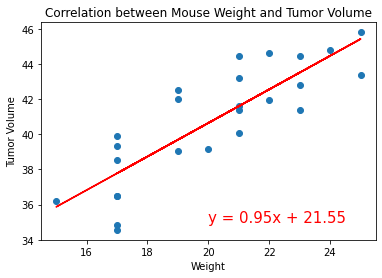

In [62]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = cap_avg["Weight (g)"]
y_values = cap_avg["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 35),fontsize=15,color="red")
plt.title("Correlation between Mouse Weight and Tumor Volume")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()
